In [2]:
pip install prophet

  Using cached holidays-0.61-py3-none-any.whl.metadata (26 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 14.1 MB/s eta 0:00:00a 0:00:01
Using cached holidays-0.61-py3-none-any.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.


20:58:27 - cmdstanpy - INFO - Chain [1] start processing
20:58:28 - cmdstanpy - INFO - Chain [1] done processing


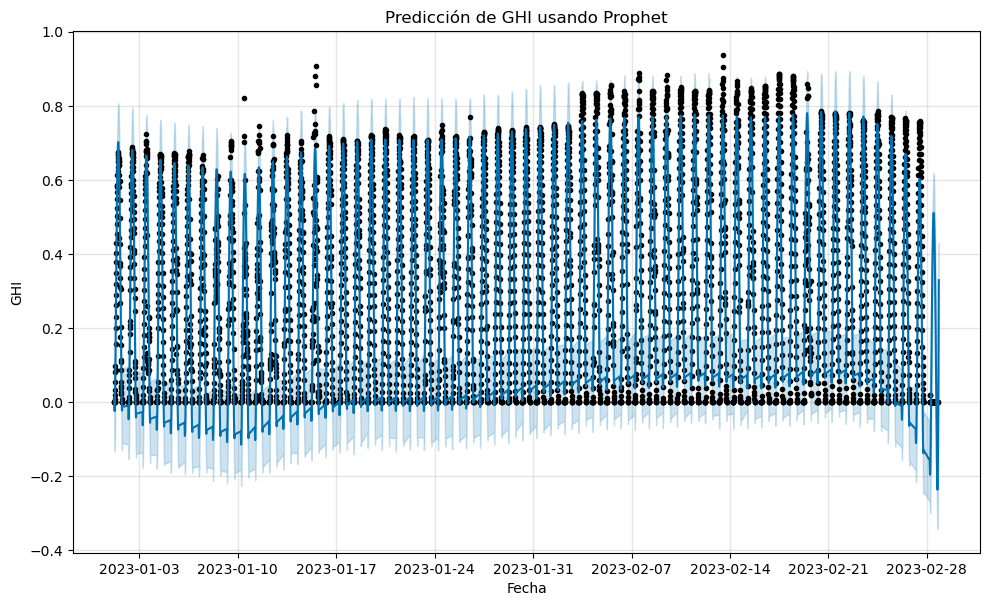

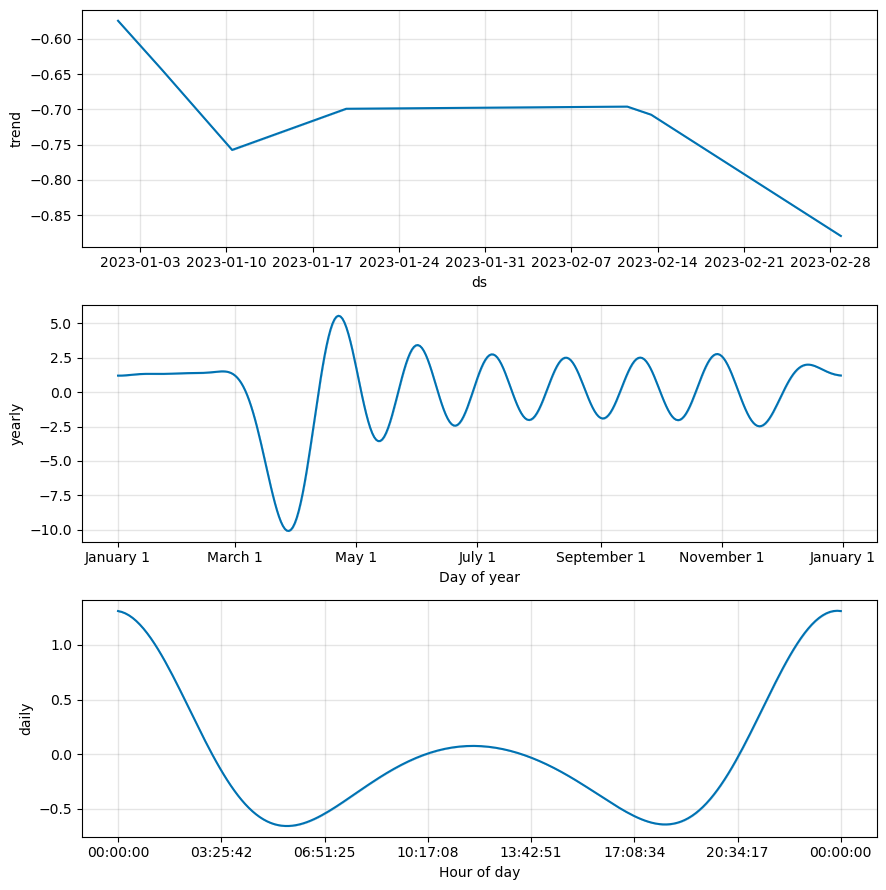

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 1. Cargar los datos
df = pd.read_pickle('/home/aia-workstation/Documents/Santiago/Modelo/Cloud_Forecasting_CNN_LSTM/df_GHI.plk')
fecha_inicio_entrenamiento = '2023-01-01 05:00:00'
fecha_fin_entrenamiento = '2023-02-28 18:30:00'

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_entrenamiento = df[(df['Timestamp'] >= fecha_inicio_entrenamiento) & (df['Timestamp'] <= fecha_fin_entrenamiento)]

# Renombrar columnas para Prophet: 'ds' para Timestamp y 'y' para la variable objetivo (GHI)
df_prophet = df_entrenamiento.rename(columns={'Timestamp': 'ds', 'GHI': 'y'})

# 2. Crear y ajustar el modelo Prophet
model = Prophet(
    daily_seasonality=True,   # Incorporar estacionalidad diaria
    weekly_seasonality=False,  # Incorporar estacionalidad semanal
    yearly_seasonality=True   # Incorporar estacionalidad anual (opcional)
)

# Ajustar el modelo con los datos
model.fit(df_prophet)

# 3. Realizar predicciones a futuro
# Crear un DataFrame con fechas futuras para predecir (por ejemplo, los próximos 12 pasos de 10 minutos)
future_dates = model.make_future_dataframe(periods=12, freq='10min')

# Hacer las predicciones
forecast = model.predict(future_dates)

# 4. Visualizar los resultados
# Graficar la predicción
fig = model.plot(forecast)
plt.title('Predicción de GHI usando Prophet')
plt.xlabel('Fecha')
plt.ylabel('GHI')
plt.show()

# Graficar los componentes del modelo (tendencia y estacionalidad)
fig2 = model.plot_components(forecast)
plt.show()


20:58:28 - cmdstanpy - INFO - Chain [1] start processing
20:58:29 - cmdstanpy - INFO - Chain [1] done processing


MAE en el conjunto de prueba: 0.306
RMSE en el conjunto de prueba: 0.333
R² del modelo en el conjunto de prueba: -0.595


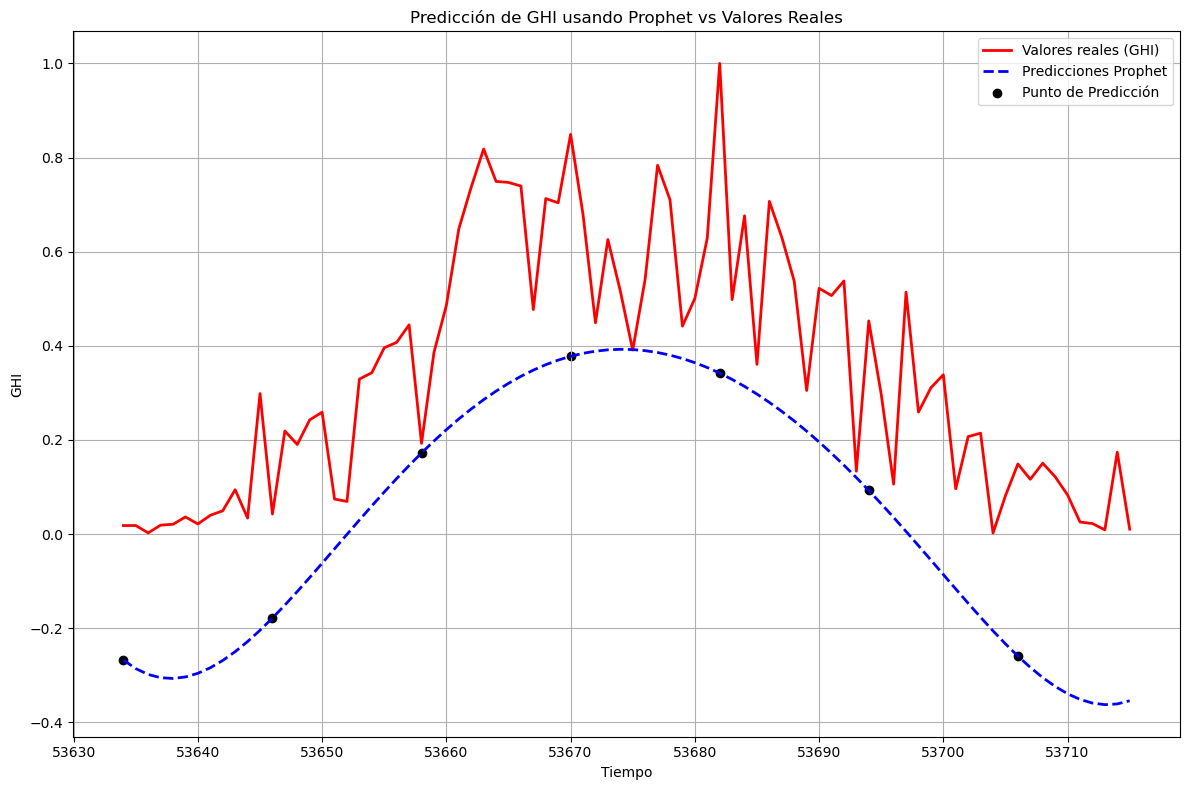

In [16]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Cargar los datos
df = pd.read_pickle('/home/aia-workstation/Documents/Santiago/Modelo/Cloud_Forecasting_CNN_LSTM/df_GHI.plk')
fecha_inicio_entrenamiento = '2023-01-01 05:00:00'
fecha_fin_entrenamiento = '2023-02-28 18:30:00'

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_entrenamiento = df[(df['Timestamp'] >= fecha_inicio_entrenamiento) & (df['Timestamp'] <= fecha_fin_entrenamiento)]

# Renombrar columnas para Prophet: 'ds' para Timestamp y 'y' para la variable objetivo (GHI)
df_prophet = df_entrenamiento.rename(columns={'Timestamp': 'ds', 'GHI': 'y'})

# 2. Crear y ajustar el modelo Prophet
model = Prophet(
    daily_seasonality=True,   # Incorporar estacionalidad diaria
    weekly_seasonality=False,  # Incorporar estacionalidad semanal
    yearly_seasonality=True   # Incorporar estacionalidad anual (opcional)
)

# Ajustar el modelo con los datos
model.fit(df_prophet)

# 3. Realizar predicciones a futuro
# Crear un DataFrame con fechas futuras para predecir (por ejemplo, los próximos 12 pasos de 10 minutos)
future_dates = model.make_future_dataframe(periods=12, freq='10min')

# Hacer las predicciones
forecast = model.predict(future_dates)

# Extraer los valores reales y las predicciones en el intervalo de prueba
fecha_inicio_prueba = '2023-03-01 00:00:00'  # Fecha de inicio de prueba
fecha_fin_prueba = '2023-03-01 23:00:00'  # Fecha de fin de prueba
df_prueba = df[(df['Timestamp'] >= fecha_inicio_prueba) & (df['Timestamp'] <= fecha_fin_prueba)]
df_prueba_prophet = df_prueba.rename(columns={'Timestamp': 'ds', 'GHI': 'y'})

# Predecir en el conjunto de prueba
future_prueba_dates = df_prueba_prophet[['ds']]
forecast_prueba = model.predict(future_prueba_dates)

# 4. Evaluación del modelo en el conjunto de prueba
# Calcular métricas de error
y_true = df_prueba['GHI'].values
y_pred = forecast_prueba['yhat'].values

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f'MAE en el conjunto de prueba: {mae:.3f}')
print(f'RMSE en el conjunto de prueba: {rmse:.3f}')
print(f'R² del modelo en el conjunto de prueba: {r2:.3f}')

# 5. Graficar los resultados de la predicción similar a las otras gráficas
plt.figure(figsize=(12, 8))

# Predicción vs Valores Reales
plt.plot(df_prueba.index, y_true, label='Valores reales (GHI)', color='red', linewidth=2)
plt.plot(df_prueba.index, y_pred, label='Predicciones Prophet', color='blue', linestyle='--', linewidth=2)

# Puntos negros en el inicio de cada predicción
plt.scatter(df_prueba.index[::12], y_pred[::12], color='black', marker='o', label='Punto de Predicción')

plt.title('Predicción de GHI usando Prophet vs Valores Reales')
plt.xlabel('Tiempo')
plt.ylabel('GHI')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



20:58:30 - cmdstanpy - INFO - Chain [1] start processing
20:58:31 - cmdstanpy - INFO - Chain [1] done processing


Métricas para cada paso de predicción:
Step 1: MAE = 0.301, MSE = 0.108
Step 2: MAE = 0.301, MSE = 0.108
Step 3: MAE = 0.301, MSE = 0.108
Step 4: MAE = 0.301, MSE = 0.109
Step 5: MAE = 0.301, MSE = 0.109
Step 6: MAE = 0.301, MSE = 0.109
Step 7: MAE = 0.300, MSE = 0.109
Step 8: MAE = 0.300, MSE = 0.109
Step 9: MAE = 0.300, MSE = 0.109
Step 10: MAE = 0.299, MSE = 0.109
Step 11: MAE = 0.299, MSE = 0.109
Step 12: MAE = 0.299, MSE = 0.109


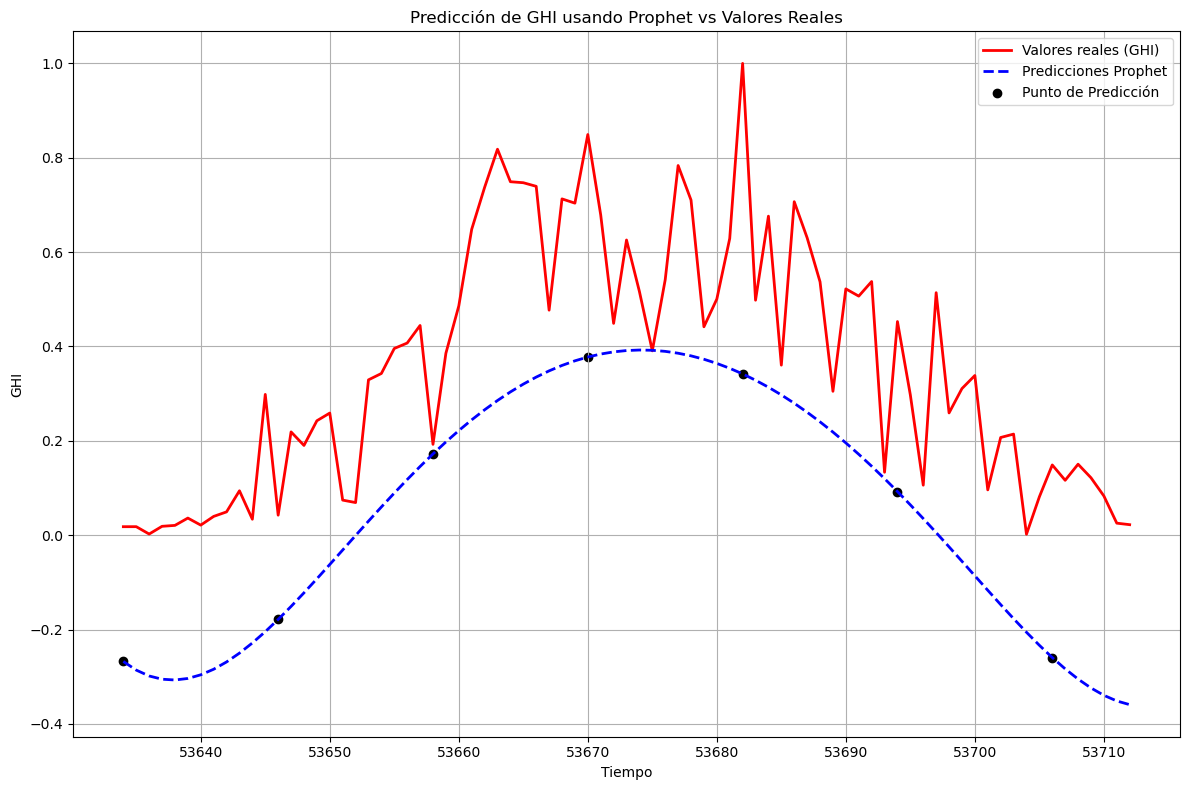

In [17]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Cargar los datos
df = pd.read_pickle('/home/aia-workstation/Documents/Santiago/Modelo/Cloud_Forecasting_CNN_LSTM/df_GHI.plk')
fecha_inicio_entrenamiento = '2023-01-01 05:00:00'
fecha_fin_entrenamiento = '2023-02-28 18:30:00'

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_entrenamiento = df[(df['Timestamp'] >= fecha_inicio_entrenamiento) & (df['Timestamp'] <= fecha_fin_entrenamiento)]

# Renombrar columnas para Prophet: 'ds' para Timestamp y 'y' para la variable objetivo (GHI)
df_prophet = df_entrenamiento.rename(columns={'Timestamp': 'ds', 'GHI': 'y'})

# 2. Crear y ajustar el modelo Prophet
model = Prophet(
    daily_seasonality=True,   # Incorporar estacionalidad diaria
    weekly_seasonality=False,  # Incorporar estacionalidad semanal
    yearly_seasonality=True   # Incorporar estacionalidad anual (opcional)
)

# Ajustar el modelo con los datos
model.fit(df_prophet)

# 3. Realizar predicciones a futuro
# Crear un DataFrame con fechas futuras para predecir (por ejemplo, los próximos 12 pasos de 10 minutos)
future_dates = model.make_future_dataframe(periods=12, freq='10min')

# Hacer las predicciones
forecast = model.predict(future_dates)

# Extraer los valores reales y las predicciones en el intervalo de prueba
fecha_inicio_prueba = '2023-03-01 05:00:00'  # Fecha de inicio de prueba
fecha_fin_prueba = '2023-03-01 18:00:00'  # Fecha de fin de prueba
df_prueba = df[(df['Timestamp'] >= fecha_inicio_prueba) & (df['Timestamp'] <= fecha_fin_prueba)]
df_prueba_prophet = df_prueba.rename(columns={'Timestamp': 'ds', 'GHI': 'y'})

# Predecir en el conjunto de prueba
future_prueba_dates = df_prueba_prophet[['ds']]
forecast_prueba = model.predict(future_prueba_dates)

# 4. Evaluación del modelo en el conjunto de prueba
# Calcular métricas de error
y_true = df_prueba['GHI'].values
y_pred = forecast_prueba['yhat'].values

# Evaluar MAE y RMSE para cada paso de la predicción
print("Métricas para cada paso de predicción:")
for i in range(12):
    mae_step = mean_absolute_error(y_true[i:], y_pred[i:])
    mse_step = mean_squared_error(y_true[i:], y_pred[i:])
    print(f"Step {i + 1}: MAE = {mae_step:.3f}, MSE = {mse_step:.3f}")

# 5. Graficar los resultados de la predicción similar a las otras gráficas
plt.figure(figsize=(12, 8))

# Predicción vs Valores Reales
plt.plot(df_prueba.index, y_true, label='Valores reales (GHI)', color='red', linewidth=2)
plt.plot(df_prueba.index, y_pred, label='Predicciones Prophet', color='blue', linestyle='--', linewidth=2)

# Puntos negros en el inicio de cada predicción
plt.scatter(df_prueba.index[::12], y_pred[::12], color='black', marker='o', label='Punto de Predicción')

plt.title('Predicción de GHI usando Prophet vs Valores Reales')
plt.xlabel('Tiempo')
plt.ylabel('GHI')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



20:58:31 - cmdstanpy - INFO - Chain [1] start processing
20:58:32 - cmdstanpy - INFO - Chain [1] done processing


Métricas para cada paso de predicción:
Step 1: MAE = 0.301, MSE = 0.108
Step 2: MAE = 0.301, MSE = 0.108
Step 3: MAE = 0.301, MSE = 0.108
Step 4: MAE = 0.301, MSE = 0.109
Step 5: MAE = 0.301, MSE = 0.109
Step 6: MAE = 0.301, MSE = 0.109
Step 7: MAE = 0.300, MSE = 0.109
Step 8: MAE = 0.300, MSE = 0.109
Step 9: MAE = 0.300, MSE = 0.109
Step 10: MAE = 0.299, MSE = 0.109
Step 11: MAE = 0.299, MSE = 0.109
Step 12: MAE = 0.299, MSE = 0.109
R^2 en el conjunto de prueba: -0.570


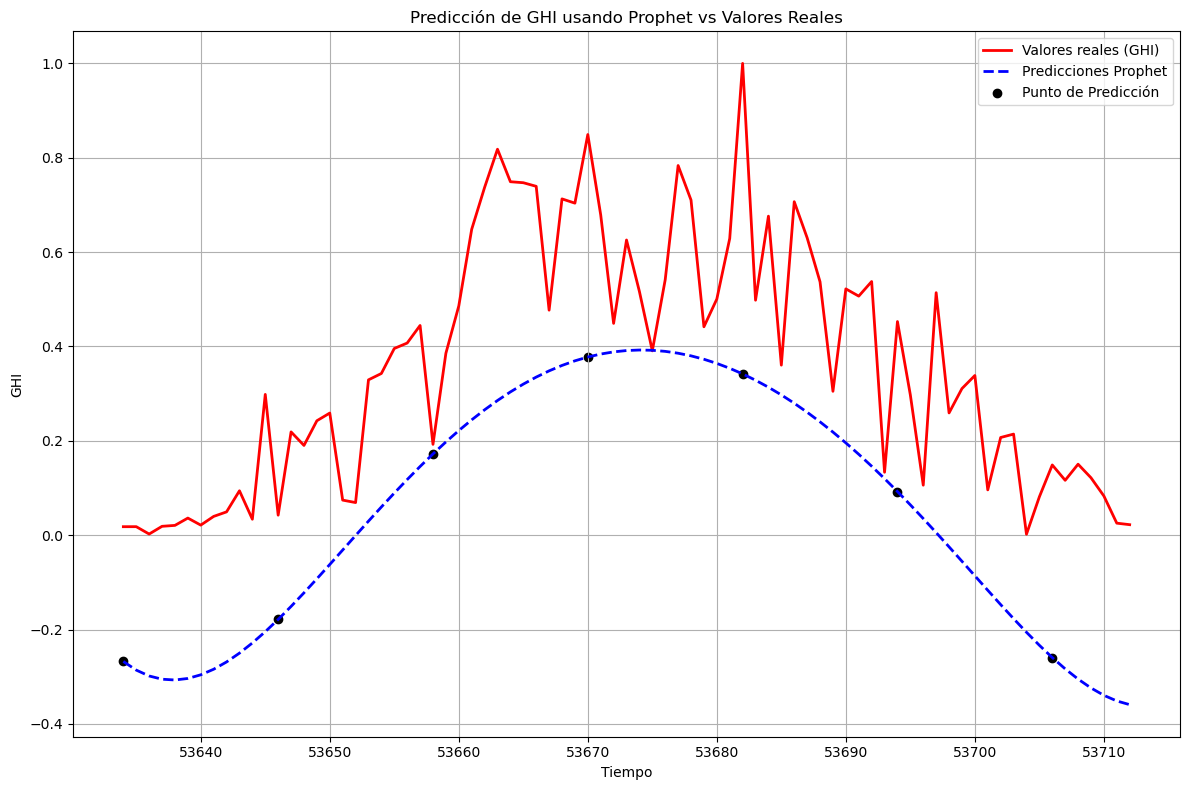

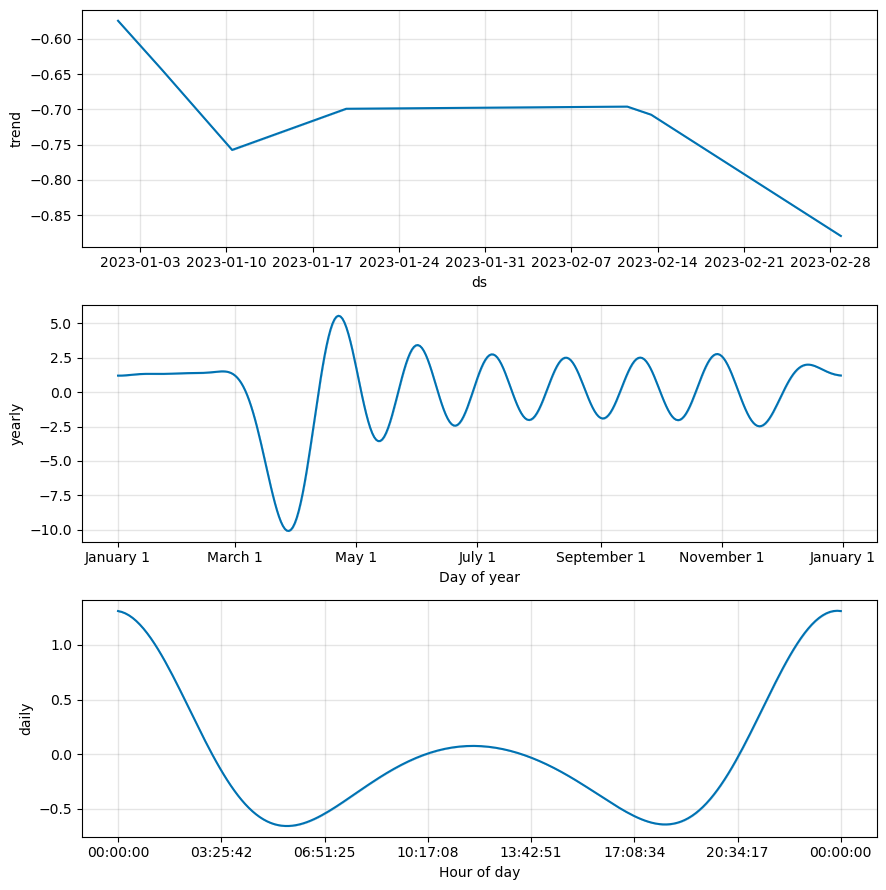

In [18]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import seaborn as sns

# 1. Cargar los datos
df = pd.read_pickle('/home/aia-workstation/Documents/Santiago/Modelo/Cloud_Forecasting_CNN_LSTM/df_GHI.plk')
fecha_inicio_entrenamiento = '2023-01-01 05:00:00'
fecha_fin_entrenamiento = '2023-02-28 18:30:00'

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_entrenamiento = df[(df['Timestamp'] >= fecha_inicio_entrenamiento) & (df['Timestamp'] <= fecha_fin_entrenamiento)]

# Renombrar columnas para Prophet: 'ds' para Timestamp y 'y' para la variable objetivo (GHI)
df_prophet = df_entrenamiento.rename(columns={'Timestamp': 'ds', 'GHI': 'y'})

# 2. Crear y ajustar el modelo Prophet
model = Prophet(
    daily_seasonality=True,   # Incorporar estacionalidad diaria
    weekly_seasonality=False,  # Incorporar estacionalidad semanal
    yearly_seasonality=True   # Incorporar estacionalidad anual (opcional)
)

# Ajustar el modelo con los datos
model.fit(df_prophet)

# 3. Realizar predicciones a futuro
# Crear un DataFrame con fechas futuras para predecir (por ejemplo, los próximos 12 pasos de 10 minutos)
future_dates = model.make_future_dataframe(periods=12, freq='10min')

# Hacer las predicciones
forecast = model.predict(future_dates)

# Extraer los valores reales y las predicciones en el intervalo de prueba
fecha_inicio_prueba = '2023-03-01 05:00:00'  # Fecha de inicio de prueba
fecha_fin_prueba = '2023-03-01 18:00:00'  # Fecha de fin de prueba
df_prueba = df[(df['Timestamp'] >= fecha_inicio_prueba) & (df['Timestamp'] <= fecha_fin_prueba)]
df_prueba_prophet = df_prueba.rename(columns={'Timestamp': 'ds', 'GHI': 'y'})

# Predecir en el conjunto de prueba
future_prueba_dates = df_prueba_prophet[['ds']]
forecast_prueba = model.predict(future_prueba_dates)

# 4. Evaluación del modelo en el conjunto de prueba
# Calcular métricas de error
y_true = df_prueba['GHI'].values
y_pred = forecast_prueba['yhat'].values

# Evaluar MAE y RMSE para cada paso de la predicción
print("Métricas para cada paso de predicción:")
for i in range(12):
    mae_step = mean_absolute_error(y_true[i:], y_pred[i:])
    mse_step = mean_squared_error(y_true[i:], y_pred[i:])
    print(f"Step {i + 1}: MAE = {mae_step:.3f}, MSE = {mse_step:.3f}")

# Calcular R^2
r2 = r2_score(y_true, y_pred)
print(f'R^2 en el conjunto de prueba: {r2:.3f}')

# 5. Graficar los resultados de la predicción similar a las otras gráficas
plt.figure(figsize=(12, 8))

# Predicción vs Valores Reales
plt.plot(df_prueba.index, y_true, label='Valores reales (GHI)', color='red', linewidth=2)
plt.plot(df_prueba.index, y_pred, label='Predicciones Prophet', color='blue', linestyle='--', linewidth=2)

# Puntos negros en el inicio de cada predicción
plt.scatter(df_prueba.index[::12], y_pred[::12], color='black', marker='o', label='Punto de Predicción')

plt.title('Predicción de GHI usando Prophet vs Valores Reales')
plt.xlabel('Tiempo')
plt.ylabel('GHI')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


# 7. Graficar los componentes del modelo (tendencia y estacionalidad)
fig2 = model.plot_components(forecast)
plt.show()



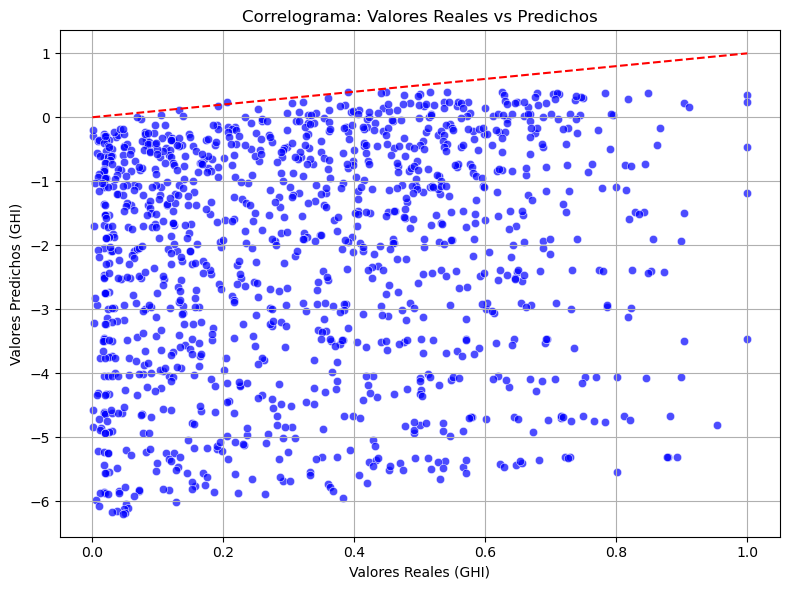

In [19]:
# Extraer los valores reales y las predicciones en el intervalo de prueba
fecha_inicio_prueba = '2023-03-01 05:00:00'  # Fecha de inicio de prueba
fecha_fin_prueba = '2023-03-15 18:00:00'  # Fecha de fin de prueba
df_prueba = df[(df['Timestamp'] >= fecha_inicio_prueba) & (df['Timestamp'] <= fecha_fin_prueba)]
df_prueba_prophet = df_prueba.rename(columns={'Timestamp': 'ds', 'GHI': 'y'})

# Predecir en el conjunto de prueba
future_prueba_dates = df_prueba_prophet[['ds']]
forecast_prueba = model.predict(future_prueba_dates)

# 4. Evaluación del modelo en el conjunto de prueba
# Calcular métricas de error
y_true = df_prueba['GHI'].values
y_pred = forecast_prueba['yhat'].values


# 6. Correlograma (scatter plot) entre valores reales y predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_true, y=y_pred, alpha=0.7, color='blue')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--')  # Línea ideal
plt.xlabel('Valores Reales (GHI)')
plt.ylabel('Valores Predichos (GHI)')
plt.title('Correlograma: Valores Reales vs Predichos')
plt.grid()
plt.tight_layout()
plt.show()




Métricas para cada paso de predicción:
Step 1: MAE = 0.801, MSE = 0.659
Step 2: MAE = 0.799, MSE = 0.654
Step 3: MAE = 0.796, MSE = 0.649
Step 4: MAE = 0.793, MSE = 0.644
Step 5: MAE = 0.790, MSE = 0.638
Step 6: MAE = 0.786, MSE = 0.632
Step 7: MAE = 0.783, MSE = 0.627
Step 8: MAE = 0.780, MSE = 0.621
Step 9: MAE = 0.777, MSE = 0.616
Step 10: MAE = 0.774, MSE = 0.611
Step 11: MAE = 0.771, MSE = 0.606
Step 12: MAE = 0.769, MSE = 0.602
R^2 en el conjunto de prueba: -15.222


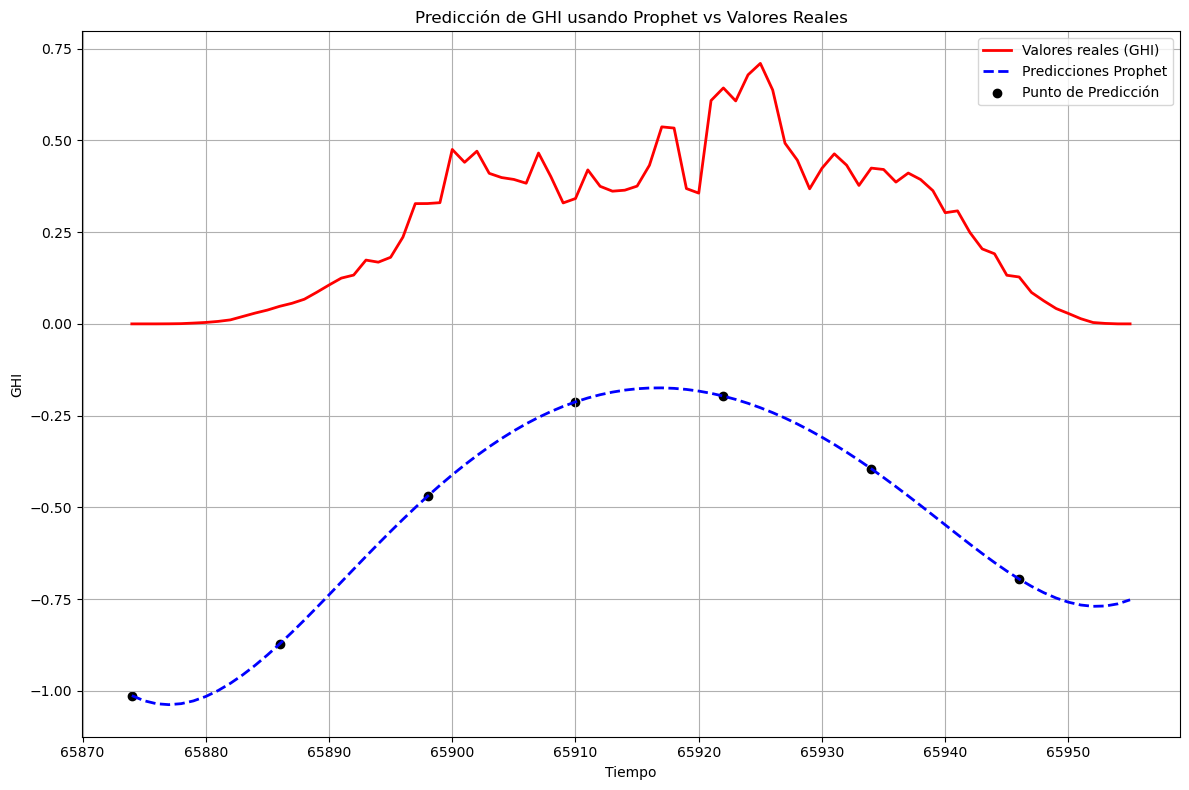

In [20]:
# Extraer los valores reales y las predicciones en el intervalo de prueba
fecha_inicio_prueba = '2023-05-25 00:00:00'  # Fecha de inicio de prueba
fecha_fin_prueba = '2023-05-25 23:00:00'  # Fecha de fin de prueba
df_prueba = df[(df['Timestamp'] >= fecha_inicio_prueba) & (df['Timestamp'] <= fecha_fin_prueba)]
df_prueba_prophet = df_prueba.rename(columns={'Timestamp': 'ds', 'GHI': 'y'})

# Predecir en el conjunto de prueba
future_prueba_dates = df_prueba_prophet[['ds']]
forecast_prueba = model.predict(future_prueba_dates)

# 4. Evaluación del modelo en el conjunto de prueba
# Calcular métricas de error
y_true = df_prueba['GHI'].values
y_pred = forecast_prueba['yhat'].values

# Evaluar MAE y RMSE para cada paso de la predicción
print("Métricas para cada paso de predicción:")
for i in range(12):
    mae_step = mean_absolute_error(y_true[i:], y_pred[i:])
    mse_step = mean_squared_error(y_true[i:], y_pred[i:])
    print(f"Step {i + 1}: MAE = {mae_step:.3f}, MSE = {mse_step:.3f}")

# Calcular R^2
r2 = r2_score(y_true, y_pred)
print(f'R^2 en el conjunto de prueba: {r2:.3f}')

# 5. Graficar los resultados de la predicción similar a las otras gráficas
plt.figure(figsize=(12, 8))

# Predicción vs Valores Reales
plt.plot(df_prueba.index, y_true, label='Valores reales (GHI)', color='red', linewidth=2)
plt.plot(df_prueba.index, y_pred, label='Predicciones Prophet', color='blue', linestyle='--', linewidth=2)

# Puntos negros en el inicio de cada predicción
plt.scatter(df_prueba.index[::12], y_pred[::12], color='black', marker='o', label='Punto de Predicción')

plt.title('Predicción de GHI usando Prophet vs Valores Reales')
plt.xlabel('Tiempo')
plt.ylabel('GHI')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


